# Manifold Learning Methods

## MNIST Digits

We use data form https://www.kaggle.com/c/digit-recognizer/data. Subsamples were used to spead up the calculation.

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

In [2]:
# load train data, save class labels, plot first point as a digit
#load train data
train = pd.read_csv('./data/train.csv')
# save the labels to a Pandas series target
target = train['label']
#eliminate class labels
train = train.drop("label",axis=1)
train.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 784)


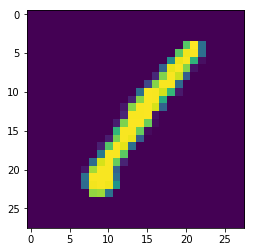

In [3]:
train_arr = np.array(train)
print(train_arr.shape)
plt.imshow(train_arr[0, :].reshape(28, 28))

In [5]:
# Taking only 1,000 rows to speed things up

X= train_arr[:1000]# train data 
X_labels= target[:1000]# labels


Automatically created module for IPython interactive environment
standard: 2.1 sec
reconstruction_error = 0.00042109570906


/home/kumar/anaconda3/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 44 is exactly zero. Singular matrix.
  RuntimeWarning)


ltsa: 2.2 sec
reconstruction_error = nan
Isomap: 2.3 sec
reconstruction_error = 6710310.08065
MDS: 2.8 sec
SpectralEmbedding: 1.9 sec
t-SNE: 4.4 sec


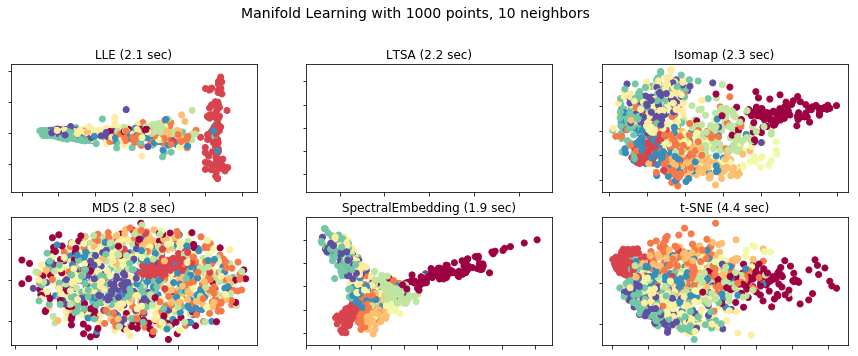

In [6]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold

n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

methods = ['standard', 'ltsa']
labels = ['LLE', 'LTSA']

color = np.array(X_labels)

for i, method in enumerate(methods):
    t0 = time()
    LLE = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method)
    Y = LLE.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    print("reconstruction_error = " + str(LLE.reconstruction_error_))


    ax = fig.add_subplot(331 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    

#IsoMap
t0 = time()
isomap = manifold.Isomap(n_neighbors, n_components)
Y = isomap.fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
print("reconstruction_error = " + str(isomap.reconstruction_error()))
ax = fig.add_subplot(333)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

#MDS
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
#print("reconstruction_error = " + str(mds.reconstruction_error_))
ax = fig.add_subplot(334)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


#SpectralEmbedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(335)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

#TSNE
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(336)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [7]:
#load test data
test = pd.read_csv('./data/test.csv')
test.head()
test_arr = np.array(test)
print(train_arr.shape)


(42000, 784)


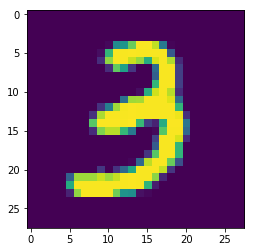

In [8]:
point_1= test_arr[7, :]
plt.imshow(test_arr[7, :].reshape(28, 28))

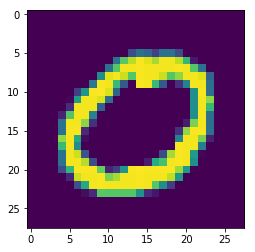

In [9]:
point_2=test_arr[8, :]
plt.imshow(test_arr[8, :].reshape(28, 28))

In [10]:
projection_1 = isomap.transform(np.array(point_1).reshape(1, -1))
Y = isomap.transform(X)

In [11]:
projection_2 = isomap.transform(np.array(point_2).reshape(1, -1))

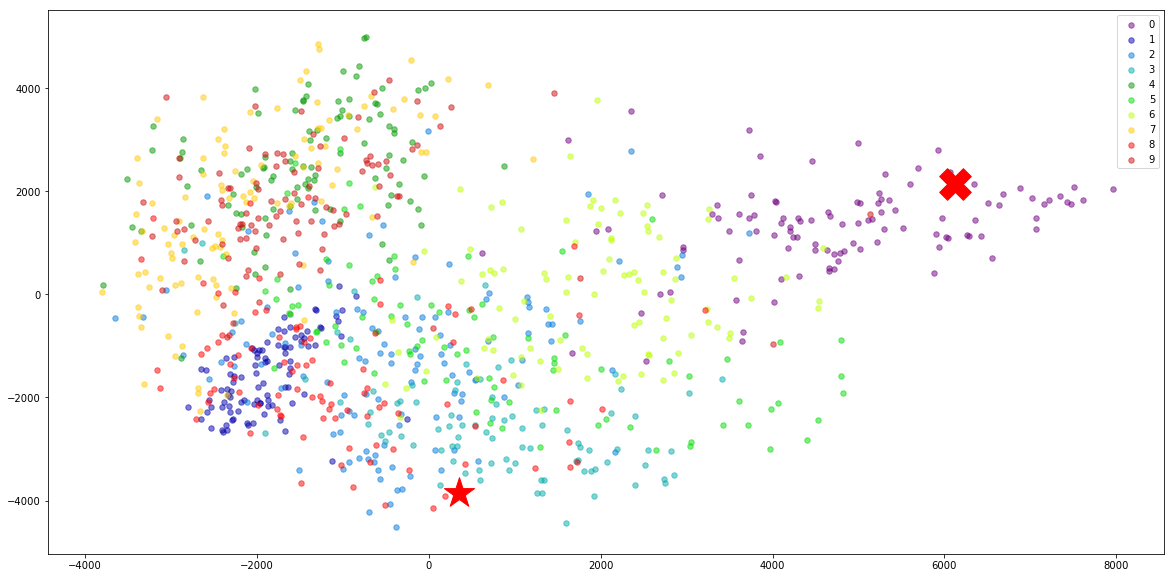

In [12]:
plt.figure(figsize=(20,10))
for i in range(10):
    ind = np.argwhere(color == i)
    plt.scatter(Y[ind, 0], Y[ind, 1], c=plt.cm.spectral(0.1 * (i + 0.5)), s = 30, label=i, alpha = 0.5)
plt.scatter(projection_1[:, 0], projection_1[:, 1], c = "red", marker = '*', s = 1000)
plt.scatter(projection_2[:, 0], projection_2[:, 1], c = "red", marker = 'X', s = 1000)
plt.legend()
plt.show()

Projection was point_1 (star 3) and point_2 ( cross 0) falls on the currect regions. This proves that ISOMAP projection out of samples is correct. There is problem with the data or data samples we are using, as some methods fails (LTSA). ALso seperation of some numbers are blurred. Need some more experiments to culster it properly.